In [60]:
import json
import requests
import pandas as pd

In [37]:
with open('bud_client_key.json', 'r') as f:    
    f_json = json.load(f)
    client_id = f_json['clientId']
    client_secret = f_json['clientSecret']

## (Re)-Authentication

In [ ]:
from requests.auth import HTTPBasicAuth
basic_auth = HTTPBasicAuth(client_id, client_secret)

auth_url = 'https://api-sandbox.thisisbud.com/v1/oauth/token'

body = 'grant_type=client_credentials'
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

auth_r = requests.post(auth_url, data=body, headers=headers, auth = basic_auth)
auth_r.text

In [40]:
access_token = auth_r.json()['data']['access_token']
refresh_token = auth_r.json()['data']['refresh_token']

with open('bud_client_key.json', 'r') as f:
    f_json = json.load(f)

f_json['access_token'] = access_token
f_json['refresh_token'] = refresh_token

with open('bud_client_key.json', 'w') as new_f:
    json.dump(f_json, new_f)

In [42]:
# TODO - Updating access_token with refresh_token to be added later!

## Customer Creation

In [ ]:
new_customer_url = 'https://api-sandbox.thisisbud.com/v1/customers'

headers = {'Content-Type': 'application/x-www-form-urlencoded',
           'Authorization':  f'Bearer {access_token}',
           'X-Client-Id': client_id}

new_c_r = requests.post(new_customer_url, 
                        headers=headers)
new_c_r.json()

In [51]:
with open('bud_customers.json', 'w') as f_c:
    c_json = {'customers': [new_c_r.json()['data']]}
    json.dump(c_json, f_c)

In [52]:
customer_id = new_c_r.json()['data']['customer_id']
customer_secret = new_c_r.json()['data']['customer_secret']

In [ ]:
# TODO - Save new customers to the same list if it exists!

## Open Banking Dummy Connection

In [ ]:
new_ob_connection_url = 'https://api-sandbox.thisisbud.com/v2/open-banking/authorisation-gateway-url'

headers = {'Content-Type': 'application/x-www-form-urlencoded',
           'Authorization':  f'Bearer {access_token}',
           'X-Client-Id': client_id,
           'X-Customer-Id': customer_id,
           'X-Customer-Secret': customer_secret}

data = {'redirect_url': 'https://my-agent-webapp.com/connected?my-parameter=xyz'}

new_ob_connection_r = requests.post(new_ob_connection_url, headers=headers, 
                                    data=json.dumps(data))
new_ob_connection_r.json()

## Customer Data Retrieval

In [59]:
accounts_data_url = 'https://api-sandbox.thisisbud.com/v1/open-banking/accounts'

headers = {'Content-Type': 'application/x-www-form-urlencoded',
           'Authorization':  f'Bearer {access_token}',
           'X-Client-Id': client_id,
           'X-Customer-Id': customer_id,
           'X-Customer-Secret': customer_secret}

accounts_r = requests.get(accounts_data_url, headers=headers)



{'operation_id': 'v1_accounts_get',
 'data': [{'account_id': '1fa5f939-9183-4ea0-9fe9-471383dea4d5',
   'currency': 'GBP',
   'account_type': 'Personal',
   'account_sub_type': 'CurrentAccount',
   'nickname': 'Current Account Joint - Nationwide - Jim & Judy',
   'details': [{'scheme_name': 'UK.OBIE.SortCodeAccountNumber',
     'identification': '80540122222127',
     'name': 'Current Account Joint - Nationwide - Jim & Judy',
     'secondary_identification': ''},
    {'scheme_name': 'SortCode',
     'identification': '805401',
     'name': 'Current Account Joint - Nationwide - Jim & Judy',
     'secondary_identification': ''},
    {'scheme_name': 'AccountNumber',
     'identification': '22222127',
     'name': 'Current Account Joint - Nationwide - Jim & Judy',
     'secondary_identification': ''}],
   'provider': 'Natwest_Sandbox',
   'balances': [{'account_id': '1fa5f939-9183-4ea0-9fe9-471383dea4d5',
     'amount': {'amount': '3135.80', 'currency': 'GBP'},
     'credit_debit_indicator

In [63]:
df_accounts = pd.io.json.json_normalize(accounts_r.json()['data'])
df_accounts

/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_50055/752122488.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_accounts = pd.io.json.json_normalize(accounts_r.json()['data'])


account_id currency account_type  \
0  1fa5f939-9183-4ea0-9fe9-471383dea4d5      GBP     Personal   
1  ee0f46f7-3256-471a-b7c9-f4eb053c88ca      GBP     Personal   
2  d607d0da-fb58-497f-ac51-d70f309be304      GBP     Personal   
3  1da3ba98-07f7-469e-b7e7-3a7cfcf19b82      GBP     Personal   
4  6aa9a396-75ca-48da-9dba-5f4094cb3a83      GBP     Personal   

  account_sub_type                                         nickname  \
0   CurrentAccount  Current Account Joint - Nationwide - Jim & Judy   
1   CurrentAccount                      Credit Card - Natwest - Jim   
2   CurrentAccount                    Debit Card - Nationwide - Jim   
3   CurrentAccount                  Savings Account - Natwest - Jim   
4   CurrentAccount                    Debit Account - Natwest - Jim   

                                             details         provider  \
0  [{'scheme_name': 'UK.OBIE.SortCodeAccountNumbe...  Natwest_Sandbox   
1  [{'scheme_name': 'UK.OBIE.SortCodeAccountNumbe...  Natwest_Sandbox   
2  [{'scheme_name': 'UK.OBIE.SortCodeAccountNumbe...  Natwest_Sandbox   
3  [{'scheme_name': 'UK.OBIE.SortCodeAccountNumbe...  Natwest_Sandbox   
4  [{'scheme_name': 'UK.OBIE.SortCodeAccountNumbe...  Natwest_Sandbox   

                                            balances parties  
0  [{'account_id': '1fa5f939-9183-4ea0-9fe9-47138...      []  
1  [{'account_id': 'ee0f46f7-3256-471a-b7c9-f4eb0...      []  
2  [{'account_id': 'd607d0da-fb58-497f-ac51-d70f3...      []  
3  [{'account_id': '1da3ba98-07f7-469e-b7e7-3a7cf...      []  
4  [{'account_id': '6aa9a396-75ca-48da-9dba-5f409...      []

In [64]:
trx_data_url = 'https://api-sandbox.thisisbud.com/v1/open-banking/transactions'

headers = {'Content-Type': 'application/x-www-form-urlencoded',
           'Authorization':  f'Bearer {access_token}',
           'X-Client-Id': client_id,
           'X-Customer-Id': customer_id,
           'X-Customer-Secret': customer_secret}

trx_data_url_r = requests.get(trx_data_url, headers=headers)

trx_data_url_r.json()

{'operation_id': 'v1_transactions_get',
 'data': [{'id': '89c1dea37b406fbbf14ebcf5c9118a56b75275c0eeb9233c48ce6626ed993ba1',
   'provider': 'Natwest_Sandbox',
   'raw_transaction': {'transaction_id': '89c1dea37b406fbbf14ebcf5c9118a56b75275c0eeb9233c48ce6626ed993ba1',
    'account_id': '6aa9a396-75ca-48da-9dba-5f4094cb3a83',
    'transaction_reference': None,
    'amount': {'amount': '26.48', 'currency': 'GBP'},
    'credit_debit_indicator': 'Debit',
    'status': 'Booked',
    'booking_date_time': '2021-10-07T00:01:00Z',
    'value_date_time': None,
    'address_line': None,
    'transaction_information': 'Standing order to NWBK93134999991236',
    'bank_transaction_code': {'code': None, 'sub_code': None},
    'proprietary_bank_transaction_code': {'code': 'TFR', 'issuer': ''},
    'balance': {'amount': {'amount': '102089.11', 'currency': 'GBP'},
     'credit_debit_indicator': 'Credit',
     'type': 'Information'},
    'merchant_details': {'merchant_name': None,
     'merchant_category_

In [65]:
df_trx = pd.io.json.json_normalize(trx_data_url_r.json()['data'])
df_trx

/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_50055/3802061925.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_trx = pd.io.json.json_normalize(trx_data_url_r.json()['data'])


id         provider  \
0     89c1dea37b406fbbf14ebcf5c9118a56b75275c0eeb923...  Natwest_Sandbox   
1     bb14ef2099a3278561ff757484e1966bdfc8339ed49ca0...  Natwest_Sandbox   
2     4e92d1766d0640fbcb90659e9325e8616ef244e5a867f2...  Natwest_Sandbox   
3     fd542c37a8e8430e63613ef88b729dc3ee909c5795d477...  Natwest_Sandbox   
4     41653cc89967d2c7f8e50458a84fa16784eb3f549b51c4...  Natwest_Sandbox   
...                                                 ...              ...   
1019  b3d39c2c06deb23d06e31ce0f0abb6ba7812338946e07b...  Natwest_Sandbox   
1020  6edd0456de5ddfc3f24eeeaec4161ebc433ae15a3c24c9...  Natwest_Sandbox   
1021  a291cfe2de4bd11a1593334c1957c350f7248e9e77dc69...  Natwest_Sandbox   
1022  ac5983145dd53c6c63dd9a53630716445b559fb26a2101...  Natwest_Sandbox   
1023  c0f83339afc619719c8a3e51e133fae5d1950b35ab2fee...  Natwest_Sandbox   

                         raw_transaction.transaction_id  \
0     89c1dea37b406fbbf14ebcf5c9118a56b75275c0eeb923...   
1     bb14ef2099a3278561ff757484e1966bdfc8339ed49ca0...   
2     4e92d1766d0640fbcb90659e9325e8616ef244e5a867f2...   
3     fd542c37a8e8430e63613ef88b729dc3ee909c5795d477...   
4     41653cc89967d2c7f8e50458a84fa16784eb3f549b51c4...   
...                                                 ...   
1019  b3d39c2c06deb23d06e31ce0f0abb6ba7812338946e07b...   
1020  6edd0456de5ddfc3f24eeeaec4161ebc433ae15a3c24c9...   
1021  a291cfe2de4bd11a1593334c1957c350f7248e9e77dc69...   
1022  ac5983145dd53c6c63dd9a53630716445b559fb26a2101...   
1023  c0f83339afc619719c8a3e51e133fae5d1950b35ab2fee...   

                raw_transaction.account_id  \
0     6aa9a396-75ca-48da-9dba-5f4094cb3a83   
1     6aa9a396-75ca-48da-9dba-5f4094cb3a83   
2     1fa5f939-9183-4ea0-9fe9-471383dea4d5   
3     6aa9a396-75ca-48da-9dba-5f4094cb3a83   
4     1fa5f939-9183-4ea0-9fe9-471383dea4d5   
...                                    ...   
1019  6aa9a396-75ca-48da-9dba-5f4094cb3a83   
1020  6aa9a396-75ca-48da-9dba-5f4094cb3a83   
1021  ee0f46f7-3256-471a-b7c9-f4eb053c88ca   
1022  6aa9a396-75ca-48da-9dba-5f4094cb3a83   
1023  6aa9a396-75ca-48da-9dba-5f4094cb3a83   

     raw_transaction.transaction_reference raw_transaction.amount.amount  \
0                                     None                         26.48   
1                                     None                         26.48   
2                                     None                         23.01   
3                                     None                        250.00   
4                                     None                          9.99   
...                                    ...                           ...   
1019                                  None                          2.50   
1020                                  None                         26.48   
1021                                  None                          6.00   
1022                                  None                         32.85   
1023                                  None                          2.50   

     raw_transaction.amount.currency raw_transaction.credit_debit_indicator  \
0                                GBP                                  Debit   
1                                GBP                                  Debit   
2                                GBP                                  Debit   
3                                GBP                                  Debit   
4                                GBP                                  Debit   
...                              ...                                    ...   
1019                             GBP                                  Debit   
1020                             GBP                                  Debit   
1021                             GBP                                  Debit   
1022                             GBP                                  Debit   
1023                             GBP                                  Debit   

     raw_transac

In [128]:
df_trx_a = df_trx[['raw_transaction.account_id', 'raw_transaction.amount.amount',
                   'raw_transaction.credit_debit_indicator','raw_transaction.booking_date_time',
                'attributes.subcategory', 'raw_transaction.balance.amount.amount']]
df_trx_a['raw_transaction.booking_date_time'] = pd.to_datetime(df_trx_a['raw_transaction.booking_date_time']).dt.date
df_trx_a['raw_transaction.amount.amount'] = pd.to_numeric(df_trx_a['raw_transaction.amount.amount'],
                                                          errors = 'coerce')

df_trx_a['raw_transaction.balance.amount.amount'] = pd.to_numeric(df_trx_a['raw_transaction.balance.amount.amount'],
                                                          errors = 'coerce')

def debit_credit_sign(r):
    if r['raw_transaction.credit_debit_indicator'] == 'Credit':
        return -r['raw_transaction.amount.amount']
    else:
        return r['raw_transaction.amount.amount']

df_trx_a['raw_transaction.amount.amount'] = df_trx_a[['raw_transaction.amount.amount','raw_transaction.credit_debit_indicator']]. \
                                            apply(debit_credit_sign, axis=1)

df_trx_a['attributes.subcategory'] =  df_trx_a['attributes.subcategory']. \
                            apply(lambda r: r[0] if r else r)

df_trx_a

/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_50055/3420400584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx_a['raw_transaction.booking_date_time'] = pd.to_datetime(df_trx_a['raw_transaction.booking_date_time']).dt.date
/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_50055/3420400584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx_a['raw_transaction.amount.amount'] = pd.to_numeric(df_trx_a['raw_transaction.amount.amount'],
/var/folders/0t/1b6bbpcj52xdthkg2d6g2

raw_transaction.account_id  raw_transaction.amount.amount  \
0     6aa9a396-75ca-48da-9dba-5f4094cb3a83                          26.48   
1     6aa9a396-75ca-48da-9dba-5f4094cb3a83                          26.48   
2     1fa5f939-9183-4ea0-9fe9-471383dea4d5                          23.01   
3     6aa9a396-75ca-48da-9dba-5f4094cb3a83                         250.00   
4     1fa5f939-9183-4ea0-9fe9-471383dea4d5                           9.99   
...                                    ...                            ...   
1019  6aa9a396-75ca-48da-9dba-5f4094cb3a83                           2.50   
1020  6aa9a396-75ca-48da-9dba-5f4094cb3a83                          26.48   
1021  ee0f46f7-3256-471a-b7c9-f4eb053c88ca                           6.00   
1022  6aa9a396-75ca-48da-9dba-5f4094cb3a83                          32.85   
1023  6aa9a396-75ca-48da-9dba-5f4094cb3a83                           2.50   

     raw_transaction.credit_debit_indicator raw_transaction.booking_date_time  \
0                                     Debit                        2021-10-07   
1                                     Debit                        2021-10-08   
2                                     Debit                        2021-10-08   
3                                     Debit                        2021-10-08   
4                                     Debit                        2021-10-08   
...                                     ...                               ...   
1019                                  Debit                        2022-10-05   
1020                                  Debit                        2022-10-06   
1021                                  Debit                        2022-10-06   
1022                                  Debit                        2022-10-06   
1023                                  Debit                        2022-10-06   

     attributes.subcategory  raw_transaction.balance.amount.amount  
0                 fast_food                              102089.11  
1                 fast_food                              102062.63  
2              mobile_phone                                2075.15  
3                   savings                              101812.63  
4             other_general                                2085.14  
...                     ...                                    ...  
1019       public_transport                              127012.42  
1020              fast_food                              125546.54  
1021       service_stations                                1879.45  
1022           supermarkets                              125513.69  
1023       public_transport                              125511.19  

[1024 rows x 6 columns]

In [79]:
df_trx_a.groupby(['raw_transaction.booking_date_time', 'raw_transaction.credit_debit_indicator']). \
    sum()['raw_transaction.amount.amount']

raw_transaction.booking_date_time  raw_transaction.credit_debit_indicator
2021-10-07                         Debit                                       26.48
2021-10-08                         Credit                                    -250.00
                                   Debit                                     1427.61
2021-10-09                         Debit                                       80.34
2021-10-10                         Credit                                   -6500.00
                                                                              ...   
2022-10-03                         Credit                                   -6500.00
                                   Debit                                      181.23
2022-10-04                         Debit                                       71.20
2022-10-05                         Debit                                       62.77
2022-10-06                         Debit                                    

<AxesSubplot:title={'center':'Total Credit and Debit of All Accounts per Day'}, xlabel='raw_transaction.booking_date_time'>

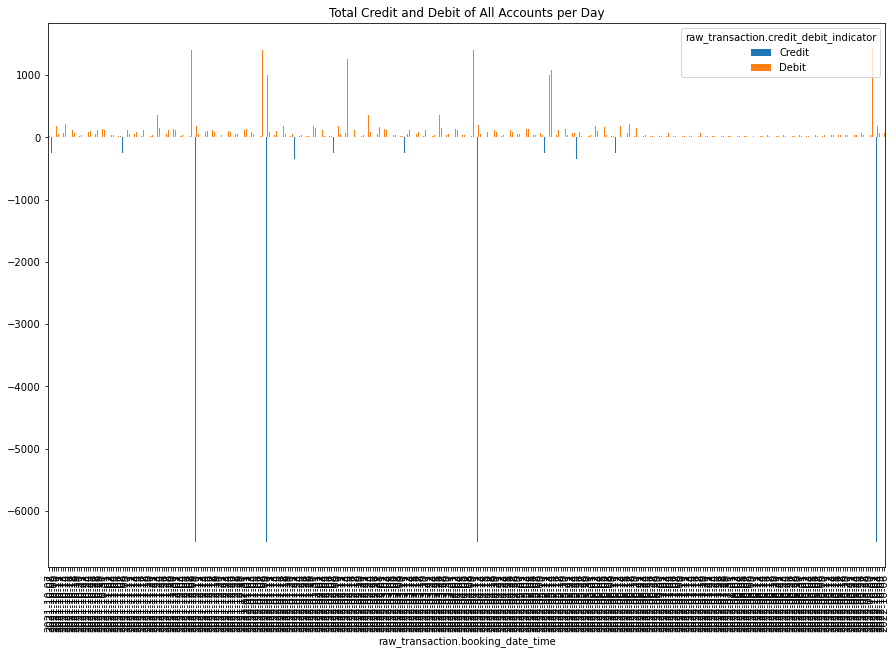

In [157]:
df_trx_a.groupby(['raw_transaction.booking_date_time', 'raw_transaction.credit_debit_indicator']). \
    sum()['raw_transaction.amount.amount'].unstack(fill_value=0).plot.bar(figsize=(15,10), 
                            title='Total Credit and Debit of All Accounts per Day')

<AxesSubplot:title={'center':'Total Credit and Debit per Account per Day - Selected Months'}, xlabel='raw_transaction.booking_date_time'>

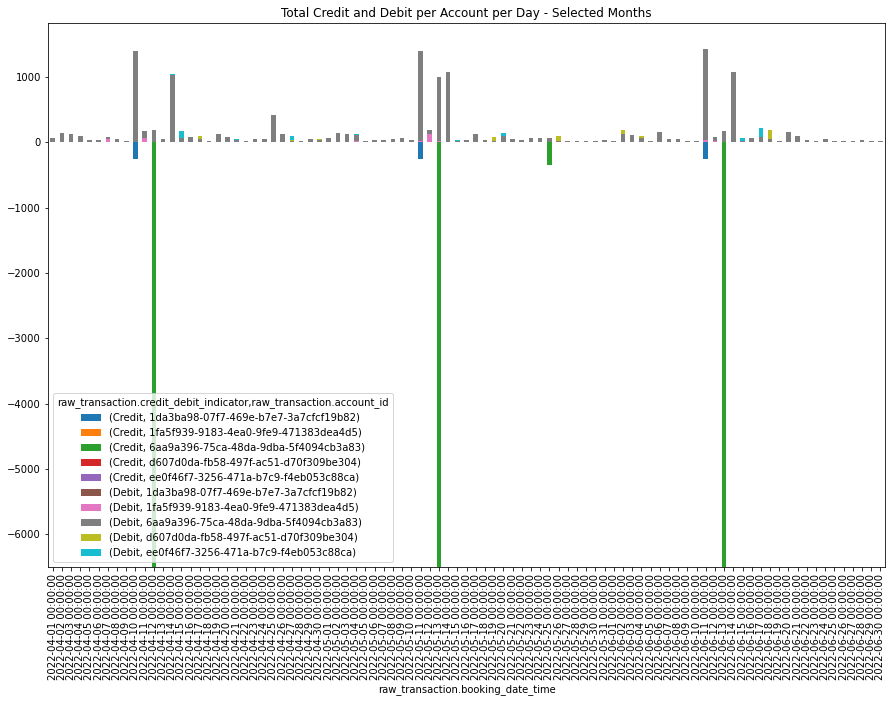

In [158]:
df_grp = df_trx_a.groupby(['raw_transaction.booking_date_time',
                  'raw_transaction.account_id',
                  'raw_transaction.credit_debit_indicator']). \
    sum()['raw_transaction.amount.amount'].unstack(fill_value=0).unstack(fill_value=0)
df_grp.index = pd.to_datetime(df_grp.index)
df_grp['2022-04':'2022-06'].plot.bar(figsize=(15,10), stacked=True,
                                    title='Total Credit and Debit per Account per Day - Selected Months')

<AxesSubplot:title={'center':'Total Debit per Transaction Subcategory! per Day - Selected Months'}, xlabel='raw_transaction.booking_date_time'>

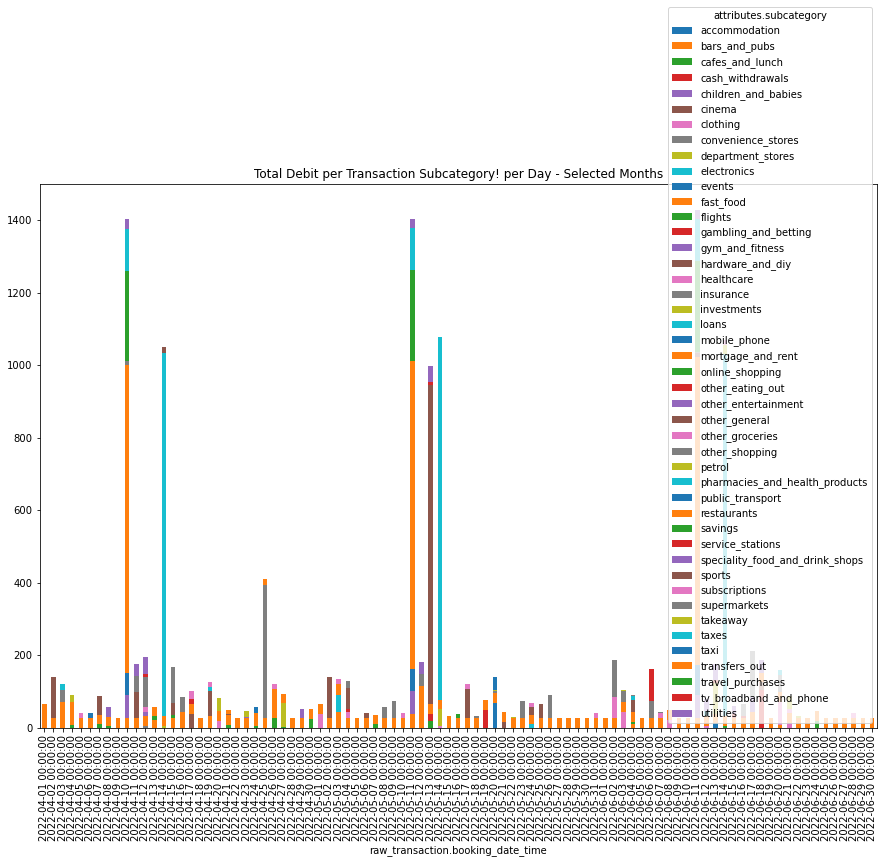

In [159]:
df_grp_sc = df_trx_a[df_trx_a['raw_transaction.credit_debit_indicator'] == 'Debit']. \
        groupby(['raw_transaction.booking_date_time',
                  'attributes.subcategory']). \
    sum()['raw_transaction.amount.amount'].unstack(fill_value=0)
df_grp_sc.index = pd.to_datetime(df_grp_sc.index)
df_grp_sc['2022-04':'2022-06'].plot.bar(figsize=(15,10), stacked=True,
                    title='Total Debit per Transaction Subcategory! per Day - Selected Months')

<AxesSubplot:title={'center':'Total Balance per Account per Day'}, xlabel='raw_transaction.booking_date_time'>

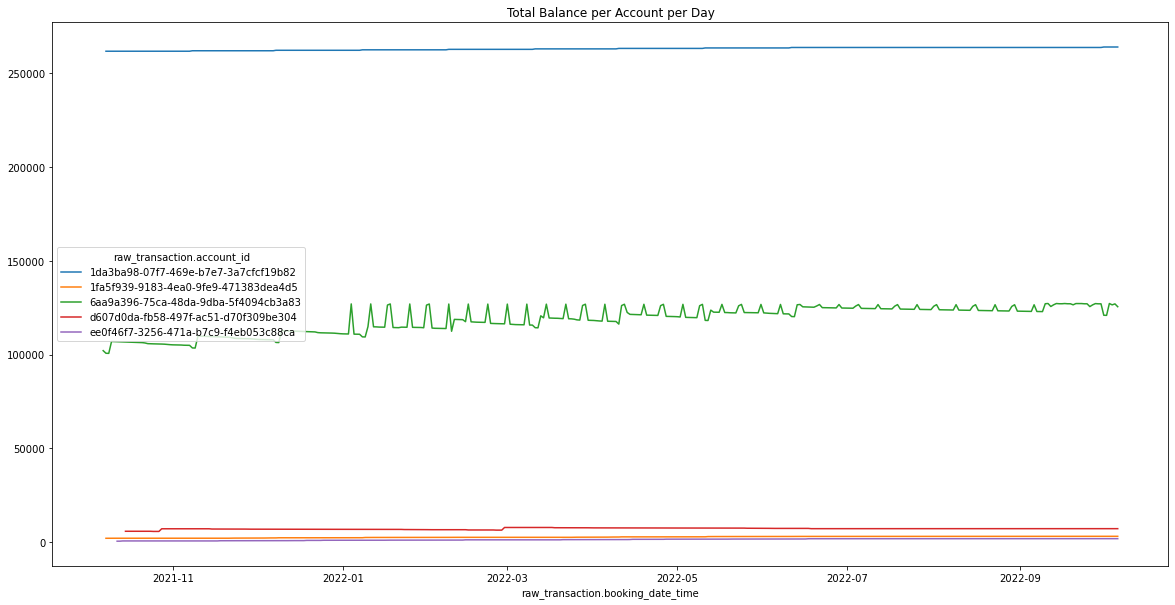

In [160]:
df_grp_bal = df_trx_a[['raw_transaction.account_id', 'raw_transaction.balance.amount.amount', 'raw_transaction.booking_date_time']]. \
    drop_duplicates(subset=['raw_transaction.account_id', 'raw_transaction.booking_date_time'], keep='last'). \
    pivot(index='raw_transaction.booking_date_time', columns='raw_transaction.account_id', values='raw_transaction.balance.amount.amount'). \
    fillna(method='ffill')

df_grp_bal.plot.line(figsize=(20,10), title='Total Balance per Account per Day')


<AxesSubplot:title={'center':'Total Balance per Selected 3 Accounts per Day'}, xlabel='raw_transaction.booking_date_time'>

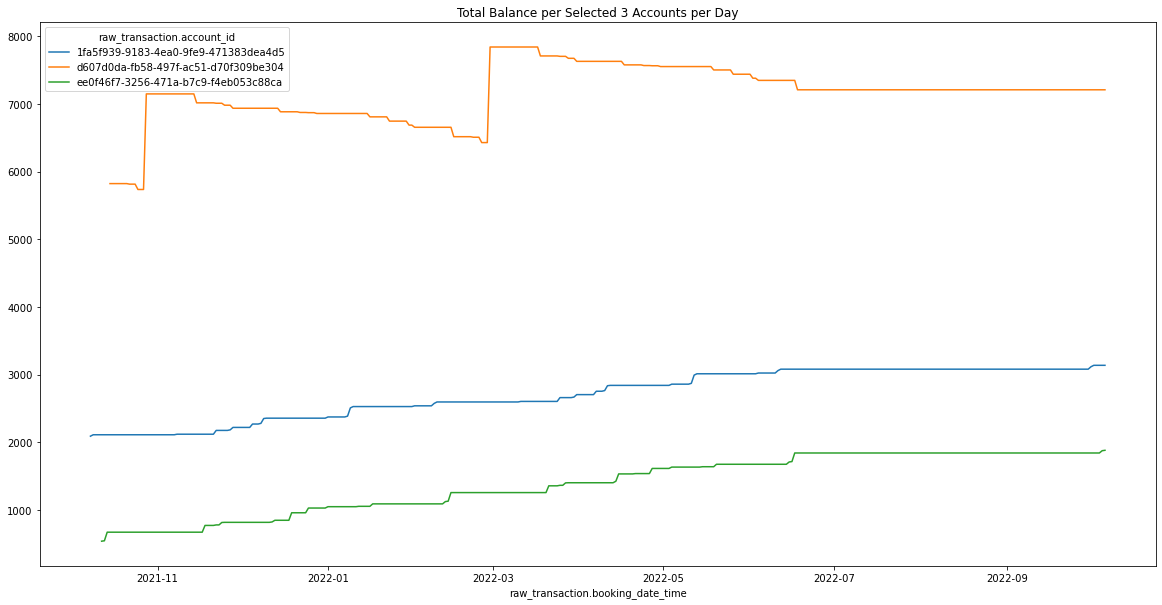

In [162]:
df_grp_bal[['1fa5f939-9183-4ea0-9fe9-471383dea4d5',
            'd607d0da-fb58-497f-ac51-d70f309be304', 
            'ee0f46f7-3256-471a-b7c9-f4eb053c88ca']]. \
    plot.line(figsize=(20,10), title='Total Balance per Selected 3 Accounts per Day')